In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
infile = '~/Desktop/mid_market_measurement/data/turn_board/Turn_Board_Active_Usage_2021_06_24.csv'


In [4]:
df = pd.read_csv(infile)

In [5]:
df.columns

Index(['CUSTOMER_SEGMENT', 'VHOST', 'PROPERTY_ID', 'UNIT_GROUP_ID', 'UNIT_ID',
       'UNIT_UUID', 'OCCUPANCY_ID', 'MOVE_OUT_DATE', 'MOVE_OUT_OCCUPANCY_ID',
       'TURN_ID', 'ACTIVE_USER_USAGE_TIMESTAMP', 'TOTAL_INTERACTIONS',
       'LAST_UPDATED_AT'],
      dtype='object')

In [10]:
df[df["ACTIVE_USER_USAGE_TIMESTAMP"].notna()]

,CUSTOMER_SEGMENT,VHOST,PROPERTY_ID,UNIT_GROUP_ID,UNIT_ID,UNIT_UUID,OCCUPANCY_ID,MOVE_OUT_DATE,MOVE_OUT_OCCUPANCY_ID,TURN_ID,ACTIVE_USER_USAGE_TIMESTAMP,TOTAL_INTERACTIONS,LAST_UPDATED_AT,LAST_UPDATED_DATE
189,B) Mid-Market (500-1499),authorityprop,20,34,34,68aec8ea-f487-11e9-88ab-b083fed15705,1930,2021-02-22,1930.0,3.0,"[\n [\n ""50"",\n ""2021-03-12 18:56:47.00...",4.0,2021-03-12 18:56:47,2021-03-12
206,B) Mid-Market (500-1499),authorityprop,174,245,242,68b0d4d8-f487-11e9-88ab-b083fed15705,1856,2021-03-17,1856.0,93.0,"[\n [\n ""50"",\n ""2021-03-31 17:37:26.00...",1.0,2021-03-31 17:37:26,2021-03-31
213,B) Mid-Market (500-1499),authorityprop,619,813,810,68b67815-f487-11e9-88ab-b083fed15705,1100,2021-06-20,1100.0,183.0,"[\n [\n ""50"",\n ""2021-06-22 21:53:45.00...",1.0,2021-06-22 21:53:45,2021-06-22
223,B) Mid-Market (500-1499),authorityprop,81,128,126,68afe6e7-f487-11e9-88ab-b083fed15705,774,2021-05-31,774.0,165.0,"[\n [\n ""50"",\n ""2021-06-04 16:56:26.00...",3.0,2021-06-04 16:56:26,2021-06-04
247,B) Mid-Market (500-1499),authorityprop,635,830,827,68b6965f-f487-11e9-88ab-b083fed15705,1695,2021-03-26,1695.0,98.0,"[\n [\n ""50"",\n ""2021-03-31 17:37:38.00...",1.0,2021-03-31 17:37:38,2021-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573272,A) SMB (0-499),rema,34,440,537,3aa0d4e2-0291-11eb-8f8c-128616bfbc2b,1493,2021-04-30,1493.0,25.0,"[\n [\n ""107"",\n ""2021-05-28 15:36:01.0...",1.0,2021-05-28 15:36:01,2021-05-28
573273,A) SMB (0-499),rema,35,457,554,1f30a1d9-4f8b-11eb-8f8c-128616bfbc2b,1564,2021-04-30,1564.0,27.0,"[\n [\n ""9"",\n ""2021-06-08 18:38:32.000...",1.0,2021-06-08 18:38:32,2021-06-08
573274,A) SMB (0-499),rema,43,492,589,0d5eac94-a214-11eb-8f8c-128616bfbc2b,1623,2021-05-31,1623.0,32.0,"[\n [\n ""107"",\n ""2021-06-22 15:14:19.0...",1.0,2021-06-22 15:14:19,2021-06-22
573282,C) Corporate (1500-4999),rinehartrealtors,397,393,393,9a60dc75-f487-11e9-9957-12c29634c0f8,12487,2021-04-30,12487.0,138.0,"[\n [\n ""855"",\n ""2021-05-04 19:00:49.0...",1.0,2021-05-04 19:00:49,2021-05-04


In [6]:
df['MOVE_OUT_DATE'] = pd.to_datetime(df['MOVE_OUT_DATE'])
df['LAST_UPDATED_DATE'] = pd.to_datetime(df['LAST_UPDATED_AT']).dt.date
df['LAST_UPDATED_AT'] = pd.to_datetime(df['LAST_UPDATED_AT'])
df['TOTAL_INTERACTIONS'].fillna(0, inplace=True)


In [6]:
session_df = pd.DataFrame({'session' : range(0, df.groupby(['VHOST']).size().max())})
for vhost in df[df.TOTAL_INTERACTIONS != 0]['VHOST'].unique():
    session_df[vhost] = np.nan
    temp_df = df[
        (df.VHOST == vhost) &
        (df.TURN_ID.notnull())
    ].reset_index()
    temp_df['SESSION_ID'] = np.nan
    first_active = temp_df[temp_df.TOTAL_INTERACTIONS > 0].index[0]
    temp_df.loc[temp_df[first_active:].index, 'SESSION_ID'] = range(0, len(temp_df) - first_active)
    for id in temp_df[temp_df.SESSION_ID.notnull()]['SESSION_ID']:
        session_df.loc[id, vhost] = min(temp_df[(temp_df.SESSION_ID == id)]['TOTAL_INTERACTIONS'].max(), 1)


session_df

,session,authorityprop,bkmgmt,bayshoreproperties,coldwellbankercc,ctpm,gillfamilyproperties,gpmgmt,huntex,hardyrealty,...,c21rep,dalyrealty,auben,ram,realestategladiators,rema,rinehartrealtors,rueschmgmt,valleyoak,sasapartments
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4540,4540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4541,4541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4542,4542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


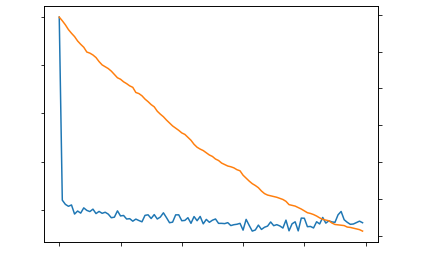

In [7]:
obs = 100
observations_df = session_df
cnt_occupancies = observations_df.iloc[:,1:].count(axis=1)[:obs]
avg_rentention = observations_df.iloc[:,1:].mean(axis=1)[:obs]

fig, ax1 = plt.subplots()
color = 'tab:blue'
text_color = 'white'
ax1.set_xlabel('nth occupancy after first meaningful turn board interaction', color=text_color)
ax1.set_ylabel('avg retention', color=text_color)
ax1.plot(avg_rentention, color=color)
ax1.tick_params(axis='y', labelcolor=text_color)
ax1.tick_params(axis='x', labelcolor=text_color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('occupancies', color=text_color)
ax2.plot(cnt_occupancies, color=color)
ax2.tick_params(axis='y', labelcolor=text_color)

fig.tight_layout()
plt.show()

In [49]:
# session_df.isin(
session_df[
    session_df.loc[:, session_df.sum() > 10].columns.tolist()
].iloc[:,1:].mean(axis=1)[:100].mean()
# )

0.33929478180619166

In [8]:
highly_engaged_VHOSTS = df[df.LAST_UPDATED_AT > '2021-05-24'].groupby('VHOST').sum()['TOTAL_INTERACTIONS']
target_VHOSTS = highly_engaged_VHOSTS[highly_engaged_VHOSTS > 10].index.tolist()
df[df.VHOST.isin(target_VHOSTS)].TOTAL_INTERACTIONS.mean()

0.7315545190570912

In [73]:
target_VHOSTS

['acornpm',
 'adastra',
 'adea',
 'ahi',
 'ahrealtyadvisors',
 'alexanderforrest',
 'alisarealty',
 'alliahmanagementllc',
 'alliancegroup',
 'alliancepropertymgmt',
 'alliedpacprop',
 'alpinepropmgmt',
 'archerinvestment',
 'arnotrealtycorporation',
 'ascendpropmgmt',
 'associaonline',
 'asuperior',
 'atmgroup',
 'babinskiproperties',
 'bartgrayrealty',
 'basco',
 'baymgmtgroup',
 'bayshoreproperties',
 'bcrg',
 'belcross',
 'bendermanagement',
 'bensonmgmt',
 'bergerbriggs',
 'birgo',
 'bkmgmt',
 'bluesky',
 'bmgphilly',
 'brandywinehomes',
 'brcrealestate',
 'bridgesmn',
 'bridgeviewpropertymanagement',
 'butlerpropertycompany',
 'buyersre',
 'bwrealestate',
 'callahan',
 'calson',
 'calwestam',
 'cambridgemgi',
 'capitalpropertymgmt',
 'castlewoodtownhomes',
 'centerpointepm',
 'chamberlain',
 'chinowth',
 'classicpm',
 'coastlineequity',
 'coleman',
 'columbiapropertymanagementllc',
 'constellation',
 'copperbay',
 'countryside',
 'cowherdconstruction',
 'curator',
 'dailymanageme

In [20]:
# highly_engaged_VHOSTS.VHOST.unique()
highly_engaged_VHOSTS = df[df.LAST_UPDATED_AT > '2021-05-24'].groupby('VHOST').sum()['TOTAL_INTERACTIONS']
target_VHOSTS = highly_engaged_VHOSTS[highly_engaged_VHOSTS > 3].index.tolist()
df[df.VHOST.isin(target_VHOSTS)].VHOST.unique().shape


(381,)